In [30]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import kstest
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# **INTRO**

## IMPORTING DATA

In [31]:
data = pd.read_csv('hotel_bookings.csv')
display(data.head(),data.info(),data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


None

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

1. Assumed the dataset is a population. Make a sample data with a ratio 1:3 from the population. Use "Jenis/Tipe Hotel" as a tools/variable to make a sampling set.
Make sure the proportion of set is balance with the "Jenis/Type Hotel" and pick the sample randomly.

In [32]:
dataLen = len(data) #119390
nCity, nResort = data['hotel'].value_counts().reset_index()['count']
percentNCity = round(nCity/dataLen*100,2)
percentNResort =  round(nResort/dataLen*100,2)
print(f'City Hotel = {nCity} ({percentNCity}%)\nResort Hotel = {nResort} ({percentNResort}%)\nTotal = {dataLen}\n30% Total = {30/100*(nCity+nResort)}')
print(f'City Hotel (sample) {percentNCity*30/100*(nCity+nResort)}')
print(f'Resort Hotel (sample) {percentNResort*30/100*(nCity+nResort)}')
    


City Hotel = 79330 (66.45%)
Resort Hotel = 40060 (33.55%)
Total = 119390
30% Total = 35817.0
City Hotel (sample) 2380039.65
Resort Hotel (sample) 1201660.3499999999


In [33]:
#data.sample(frac=0.3)
dataCityPop = data[data['hotel']=='City Hotel']
dataResortPop = data[data['hotel']=='Resort Hotel']
print(f'jumlah data City Hotel (Population) = {len(dataCityPop)}\njumlah data Resort Hotel (Population) = {len(dataResortPop)}\n')

dataCity = dataCityPop.sample(frac=0.3)
dataResort = dataResortPop.sample(frac=0.3)
print(f'jumlah data City Hotel (Sample) = {len(dataCity)}\njumlah data Resort Hotel (Sample) = {len(dataResort)}')

dataSample = pd.concat([dataCity,dataResort]).reset_index(drop=True)
len(dataSample) #35817
dataSample.head()

jumlah data City Hotel (Population) = 79330
jumlah data Resort Hotel (Population) = 40060

jumlah data City Hotel (Sample) = 23799
jumlah data Resort Hotel (Sample) = 12018


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,4,2016,June,24,8,0,1,2,...,No Deposit,NaN,NaN,0,Group,119.0,0,1,Check-Out,2016-06-09
1,City Hotel,0,3,2016,November,46,12,2,3,2,...,No Deposit,9.0,NaN,0,Transient,99.1,1,1,Check-Out,2016-11-17
2,City Hotel,1,113,2016,August,35,23,0,2,3,...,No Deposit,9.0,NaN,0,Transient,150.3,0,0,Canceled,2016-05-29
3,City Hotel,1,125,2017,April,16,20,0,3,2,...,Non Refund,33.0,NaN,0,Transient,85.0,0,0,Canceled,2016-12-16
4,City Hotel,1,1,2016,February,10,28,2,1,1,...,No Deposit,134.0,NaN,0,Transient-Party,60.0,0,0,Canceled,2016-02-27


In [34]:
dataSample.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              1
babies                                0
meal                                  0
country                             133
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4923
company                           33778


3. Apakah proporsi dari yang cancel booking lebih kecil dari 50%? gunakan data sample untuk ambil kesimpulan dari populasinya!

Kita ingin membuktikan apakah proporsi cancel booking lebih kecil dari 50%

Hypothesis:
- H0: Proporsi Cancel Booking <= 0.5
- HA: Proporsi Cancel Booking > 0.5

Sigficance level (alpha) = 0.05

In [35]:
cancelBook = dataSample[dataSample['is_canceled']==1]
is_cancelSample = dataSample['is_canceled']

propSample = len(cancelBook)/len(is_cancelSample)
propSample #kesimpulan sementara benar tapi perlu dibuktikan terlebih dahulu.

0.3678700058631376

In [36]:
from statsmodels.stats.proportion import proportions_ztest
stat, pvalue = proportions_ztest(
    count= len(cancelBook),     # jumlah buku fiction
    nobs= len(is_cancelSample),          # jumlah seluruh buku (sample)
    value= 0.5 ,             # proporsi teoritis (Ho)
    alternative = 'larger'
)

# conclusion

if pvalue <= 0.05:
    print(f'''
    Pvalue = {pvalue}. Pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa proporsi cancel booking tidak kurang dari sama dengan 50%.
    Kesimpulan sementara: H1
    ''')    

else:
    print(f'''
    Pvalue = {pvalue}. Pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi cancel booking tidak kurang dari sama dengan 50%%.
    Kesimpulan sementara: H0
    ''')



    Pvalue = 1.0. Pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi cancel booking tidak kurang dari sama dengan 50%%.
    Kesimpulan sementara: H0
    


4. Apakah jumlah orang dewasa memiliki hubungan yang kuat dengan jumlah anak? berapa besar hubungannya?

In [37]:
#CLEANSING
display(dataSample.columns)
#display(dataSample['children'].unique()) -> fillna()
#display(dataSample['adults'].unique()) -> ready

#fillna
dataSample[dataSample['children'].isna()]
dataSample['children'].fillna(0,inplace=True)

#cek normalitas
gabCekNormal = pd.concat([dataSample['adults'],dataSample['children']])
statVal, pVal = kstest(gabCekNormal, 'norm')

if pVal < 0.05:
    print("The distribution is not normal.")
else:
    print("The distribution is normal.")

#since the distribution is not normal, we use Spearman Correlation to define the correlation


display(dataSample[['adults', 'children']].corr(method = 'pearson'))
corrValue = dataSample['adults'].corr(dataSample['children'], method='spearman')
print(f'nilai korelasi = {corrValue}; menggambarkan korelasi yang cenderung kecil')


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

The distribution is not normal.


,adults,children
adults,1.000000,0.026742
children,0.026742,1.000000


nilai korelasi = 0.07198755654451545; menggambarkan korelasi yang cenderung kecil


5. Ada berapa banyak deposite type nya? apakah ada perbedaan nilai antara nilai ADR untuk setiap deposite type nya?

In [38]:
#len(dataSample['deposit_type'].unique())
print(f'jumlah tipe deposite: {len(dataSample["deposit_type"].unique())}')

jumlah tipe deposite: 3


In [39]:
#Anova: 
#H0: Sama
#H1: Beda

dtAdr1 = dataSample[dataSample['deposit_type']=='No Deposit']['adr']
dtAdr2 = dataSample[dataSample['deposit_type']=='Non Refund']['adr']
dtAdr3 = dataSample[dataSample['deposit_type']=='Refundable']['adr']

stat_val, p_val  = f_oneway(dtAdr1,dtAdr2,dtAdr3)
if p_val <= 0.05:
    print(f'Karena P Value ({p_val}) < 0.05, maka Tolak H0\nDengan begini, kita punya cukup bukti untuk menolak H0, sehingga ada perbedaan nilai antara nilai ADR untuk setiap deposite type')
else:
    print(f'Karena P Value ({p_val}) > 0.05, maka Gagal Tolak H0\nDengan begini, kita tidak punya cukup bukti untuk menolak H0, sehingga tidak ada perbedaan nilai antara nilai ADR untuk setiap deposite type')

Karena P Value (1.2062482719952526e-45) < 0.05, maka Tolak H0
Dengan begini, kita punya cukup bukti untuk menolak H0, sehingga ada perbedaan nilai antara nilai ADR untuk setiap deposite type


In [40]:
#dataSample[dataSample['adr']<300]['deposit_type'].unique()
display(dataSample.groupby('deposit_type')['adr'].max())
display(dataSample.groupby('deposit_type')['adr'].min())

deposit_type
No Deposit     510.0
Non Refund    5400.0
Refundable     209.7
Name: adr, dtype: float64

deposit_type
No Deposit     0.0
Non Refund     6.0
Refundable    10.0
Name: adr, dtype: float64

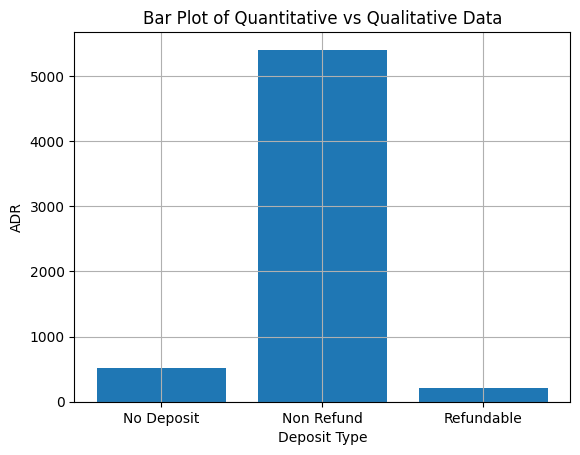

In [41]:
# Example data
adrData = dataSample['adr']
depositTypeData = dataSample['deposit_type']

# Plotting the bar plot
plt.bar(depositTypeData, adrData)

# Adding labels and title
plt.xlabel('Deposit Type')
plt.ylabel('ADR')
plt.title('Bar Plot of Quantitative vs Qualitative Data')

# Displaying the plot
plt.grid(True)
plt.show()

6. siapa stakeholders dari studi kasus ini?

Stakeholder yang dibunginkan adalah bagian eksektif (decision maker) perusahaan, marketing, atau bagian business development.

7. Coba lakukan eksplorasi terhadap data sample nya. apa informasi yang bisa kalian dapatkan dan beritahu ke stakeholders?

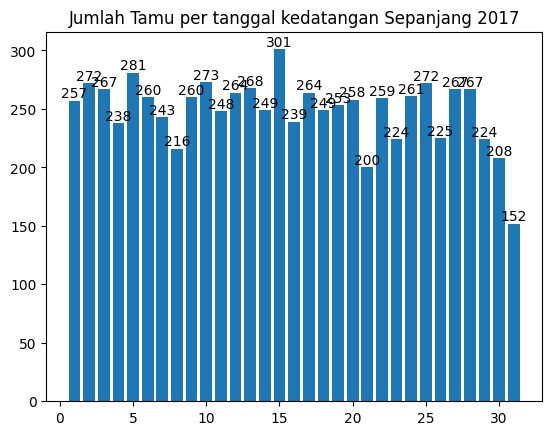

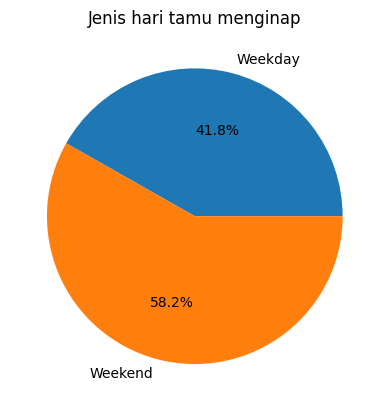

In [42]:
dataSample['arrival_date_day_of_month'].value_counts()
dataSample['arrival_date_month'].value_counts()
#jumlah sample: 35817.0
COData = dataSample[dataSample['reservation_status'] == 'Check-Out']
year2017 = COData[COData['arrival_date_year'] == 2017]
len(COData) ##22517


arrivalYear2017 = year2017['arrival_date_day_of_month'].value_counts().reset_index()

plt.figure()
plt.bar(arrivalYear2017['arrival_date_day_of_month'],arrivalYear2017['count'])
plt.title('Jumlah Tamu per tanggal kedatangan Sepanjang 2017')
for i, count in enumerate(arrivalYear2017['count']):
    plt.text(arrivalYear2017['arrival_date_day_of_month'][i], count, str(count), ha='center', va='bottom')


weekendyear2017 = year2017.groupby(COData['stays_in_weekend_nights']>0)['hotel'].count().reset_index().rename(index={False:'Weekday',True:'Weekend'})
#display(weekendyear2017)
plt.figure()
plt.pie(weekendyear2017['hotel'],labels=weekendyear2017.index, autopct='%1.1f%%')
plt.title('Jenis hari tamu menginap')
plt.show()


['PRT', 'GBR', 'FRA', 'ESP', 'DEU']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,4,2016,June,24,8,0,1,2,...,No Deposit,NaN,NaN,0,Group,119.0,0,1,Check-Out,2016-06-09
1,City Hotel,0,3,2016,November,46,12,2,3,2,...,No Deposit,9.0,NaN,0,Transient,99.1,1,1,Check-Out,2016-11-17
3,City Hotel,1,125,2017,April,16,20,0,3,2,...,Non Refund,33.0,NaN,0,Transient,85.0,0,0,Canceled,2016-12-16
4,City Hotel,1,1,2016,February,10,28,2,1,1,...,No Deposit,134.0,NaN,0,Transient-Party,60.0,0,0,Canceled,2016-02-27
6,City Hotel,1,302,2016,October,41,6,0,3,2,...,Non Refund,3.0,NaN,0,Transient,105.0,0,0,Canceled,2015-12-29


country
PRT    14451
GBR     3707
FRA     3120
ESP     2592
DEU     2216
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

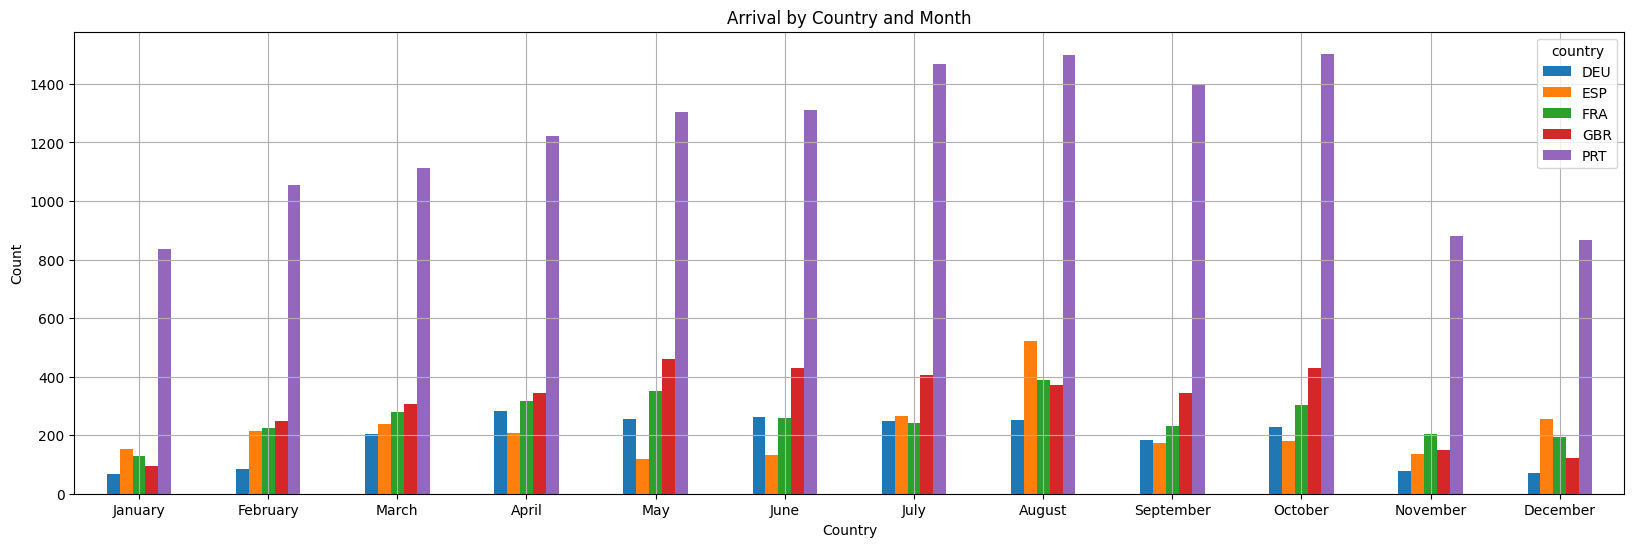

In [43]:
top10Country = dataSample['country'].value_counts().reset_index().iloc[0:5,0].to_list() #top 10 country
display(top10Country)
dataTopCountry = dataSample[dataSample['country'].isin(top10Country)]
display(dataTopCountry.head(),dataTopCountry['country'].value_counts())

dataTopCountry.groupby('country')['arrival_date_month'].sum()


month = ['January']
pivot_table = dataTopCountry.pivot_table(index='arrival_date_month',columns='country',aggfunc='count', values='hotel')
monthsOrder = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table.reindex(monthsOrder)#.reset_index()
pivot_table

plt.figure()
pivot_table.plot.bar(rot=0, figsize=(20, 6))
plt.grid()
# Set plot labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Arrival by Country and Month')

# Show the plot
plt.show()

8. coba berikan rekomendasi kalian untuk stakeholders

Analisis tahun 2017:

Terdapat peak season untuk setiap negara berdasarkan bulan kedatanganya. Untuk 5 negara teratas memiliki rincian sebagai berikut:

- Portugal    : Agustus
- Inggris     : May
- Prancis     : Agustus
- Spanyol     : Agustus
- Jerman      : May

Berdasarkan data diatas kami mencoba merekomendasikan untuk pihak strategic untuk dapat melakukan tindakan-tindakan yang diperlukan antara lain:
- Melakukan penyesuaian harga (discount atau rising price)
- Menyebarkan iklan kepada negara-negara terkait di bulan-bulan sebelum bulan peak season masing-masing
- dsb